In [12]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import random
import statistics as st
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import tokenize
import pydriller as pyd
from datetime import datetime
import ast
from scipy import stats

In [10]:
for commit in pyd.RepositoryMining(path_to_repo=path, since=tf_dt1, to=tf_dt2, only_authors=Authors).traverse_commits():
    for modified_file in commit.modifications:
        if modified_file.filename.endswith(".py"):
            tf_source = tf_source.append({'commit_ID': commit.hash, 'Author': commit.author.name,
                                          'Commit_before': modified_file.source_code_before,
                                          'Commit_after': modified_file.source_code,'nl_add':modified_file.added,
                                          'nl_remove':modified_file.removed,'nl_code':modified_file.nloc,
                                          'token_counts':modified_file.token_count}, ignore_index=True)
                #print("Code", commit.hash, commit.author.name, commit.msg,commit.author_date,
                        # modified_file.filename, flush=True)

In [13]:
class FuncParser(ast.NodeVisitor):
    def visit_Load(self, node): pass
    def visit_Store(self, node): pass
    def visit_NameConstant(self,node):pass
    def visit_Str(self, node): 
        file_contents.append(node.__class__.__name__) 
    def visit_Num(self, node):
        file_contents.append(node.__class__.__name__)
    def visit_Module(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_keyword(self,node):
        ast.NodeVisitor.generic_visit(self, node)
    def visit_arguments(self, node): 
        if(node.kwonlyargs == []):
                file_contents.append("arguments: Standard")
        elif (node.kw_defaults==[]):
            file_contents.append("arguments: kwonlyargs")
        else:
            file_contents.append("arguments: Arbitraryargs")
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Expr(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Assign(self, node): 
       # if(node.value != None):
            # file_contents.append(["Assign:"+node.value.__class__.__name__])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Compare(self,node):
        ast.NodeVisitor.generic_visit(self, node)
    def visit_AugAssign(self,node):
        temp = (node.op)
        oper= "AugAssign: " + temp.__class__.__name__ +"()"
        file_contents.append(oper)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Subscript(self,node):
        index = node.slice
        if(index.__class__.__name__ == 'Index'):
            slc = index.value
            if(slc.__class__.__name__ == 'Num'):
                file_contents.append("Subscript:Index[Num]")
            elif(slc.__class__.__name__ == 'UnaryOp'):
                operand = slc.op
                file_contents.append("Subscript:Index[UnaryOp:"+operand.__class__.__name__+"]") 
            elif(slc.__class__.__name__ == 'Name'):
                file_contents.append("Subscript:Index[Var]")
        else:
            file_contents.append("Subscript:Index["+index.__class__.__name__+"]")
            
            #ast.NodeVisitor.generic_visit(self, node)
    def visit_If(self,node):
        file_contents.append(node.__class__.__name__)
        if(node.orelse == []):
            ast.NodeVisitor.generic_visit(self, node)
        else:
            file_contents.append("orelse")
            ast.NodeVisitor.generic_visit(self, node)
    def visit_FunctionDef(self,node):
        file_contents.append("FunctionDef")
        #file_contents.append([node.name])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ClassDef(self,node):
        baselist= node.bases
        if(len(baselist)==0):
            file_contents.append("ClassDef: Simple")
            ast.NodeVisitor.generic_visit(self, node)
        elif(len(baselist)==1):
            file_contents.append("ClassDef: Inherit")
            ast.NodeVisitor.generic_visit(self, node)
        elif(len(baselist)>1):
            file_contents.append("ClassDef: MultiInherit")
            ast.NodeVisitor.generic_visit(self, node)     
    def visit_Call(self, node): 
        #file_contents.append("FuncCall")
        #ast.NodeVisitor.generic_visit(self, node)
        attrib = node.func
        if(attrib.__class__.__name__ == 'Attribute'):
            file_contents.append(attrib.attr)
            ast.NodeVisitor.generic_visit(self, node)
        elif (attrib.__class__.__name__ == 'Name'):
            file_contents.append(attrib.id)
            #file_contents.append([attrib.id])
            ast.NodeVisitor.generic_visit(self, node)
    def visit_arg(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_BinOp(self,node):
        #temp = (node.op)
        #op = "BinOp: "+temp.__class__.__name__ +"()"
        #file_contents.append(op)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Import(self, node): 
        tempImpo = node.names
        if(tempImpo != None):
            listImpo = tempImpo[0]
            Impo = listImpo.name
            file_contents.append("Import")
            file_contents.append(Impo)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ImportFrom(self, node):
        module=node.module
        file_contents.append("ImportFrom")
        file_contents.append(module)
        #if(node.module != None):
           # n3= (node.module)
           # file_contents.append("ImportFrom:" + n3)
       # else:
            #file_contents.append(node.__class__.__name__)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_alias(self, node): 
        #n1 =  (node.name)
        #file_contents.append(n1)
        #if(node.asname != None):
            #n2 =  (node.asname)
            #file_contents.append([n2])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Name(self, node):
       # temp ="Name:"+node.id
        #file_contents.append([node.id])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_comprehension(self,node):
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Attribute(self, node): 
        temp1 ="Name:"+node.attr
        file_contents.append(node.attr)
        ast.NodeVisitor.generic_visit(self, node)
    def generic_visit(self, node):
        file_contents.append(node.__class__.__name__)
        #for f in node._fields:
           # if(not f in stop_word):     
              #  file_contents.append([f])
        #ast.iter_fields(node)
        ast.NodeVisitor.generic_visit(self, node)

In [14]:
df_author_token = pd.DataFrame(columns=['Author', 'tokens', 'counts','len'])

In [15]:
i=0
error=0
vocab = {}
j = 1
for row in Heap_Dev.iterrows():
    if Heap_Dev['Commit_before'][i] is not None:
        try:
            text_before=str(Heap_Dev['Commit_before'][i])
        except:
            error +=1
        before = open("before-commit.py", "w+")
        try:     
            before.write(text_before)
        except:
            error +=1
        try:
            with tokenize.open("before-commit.py") as sf:  # need the tokenize.open for source files and not a string
                source_file_before = sf.read()
        except:
            error+=1
        try:       
            ast_before = ast.parse(source_file_before)  
        except:
            error +=1
                
        bf_obj = FuncParser()
        bf_tree = ast.parse(ast_before)
        file_contents = []
        bf_obj.visit(bf_tree)
        dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])
        tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
            
    else:
        file_contents = []
        dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])
        tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
                
    if Heap_Dev['Commit_after'][i] is not None:
        try:
            text_after=str(Heap_Dev['Commit_after'][i])
        except:
            error +=1
                
        after = open("after-commit.py", "w+")
            
        try:
            after.write(text_after)
        except:
            error +=1
        try:
            with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
                source_file_after = sf.read()
        except:
            error+=1
                
        try:
            ast_after = ast.parse(source_file_after)
        except:
            error+=1
            
        aft_obj = FuncParser()
        aft_tree = ast.parse(ast_after)
        file_contents = []
        aft_obj.visit(aft_tree)
        dtobj_after = pd.DataFrame(file_contents, columns=['token'])
        tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
        #for word in tokens_after.index:
            #if word.lower() in all_bk_tokens:
                #code_voc+=1
                
    else:
        file_contents = []
        dtobj_after = pd.DataFrame(file_contents, columns=['token'])
        tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
                  
    
    #calculating the difference
    diff = tokens_after.subtract(tokens_before)
    diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
    diff_token=diff_token.fillna(0)
    diff_token= diff_token.abs()
    diff_token = diff_token.reset_index()
    
            
    for word in diff_token['index']:
        if word.lower() in all_bk_tokens:
            if word.lower() in vocab:
                continue
            else:
                vocab[word.lower()]=j
                j+=1
        #if len(diff_token.index) >= 5:
    try:
        df_author_token = df_author_token.append({'Author':Heap_Dev['Author'][i]
                                                  ,'tokens':list(diff_token['index']),
                                                  'counts':diff_token['token'],'len':len(diff_token.index)},ignore_index=True)
            
    except KeyError:
        error+=1
    i+=1

In [16]:
df_author_token.to_csv(r'..:\Dataset\cv_token_1.csv', index=None, header=True)

In [3]:
def logML(a):  
    pro = -a*np.log(rank) - np.log(np.sum(1/rank**a))
    

    # Multiply the vector by frequencies
    Lvector =pro * frequency

    # LL is the sum
    L = Lvector.sum()

    # We want to maximize LogLikelihood or minimize (-1)*LogLikelihood
    return(-L)

In [4]:
def zipflaw(dt):
    zipf_dt = pd.DataFrame(columns=['Frequency'])
    nov_freq = dt.drop(['Author'])
    temp2=nov_freq[nov_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    probability = frequency/np.sum(frequency)
    zipf_dt['Frequency'] = frequency
    zipf_dt['Probability'] = probability
    rank=np.array(range(1,len(temp2)+1))
    zipf_dt['rank'] = rank
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    zipf_dt['alpha'] = alpha[0]
    zipf_dt['zipflaw']=(rank**(-alpha))/np.sum(1/rank**alpha)
    zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
    zipf_dt['log_rank'] = np.log(rank)
    zipf_dt['log_zipflaw'] = -alpha*np.log(rank) - np.log(np.sum(1/rank**alpha))
    return zipf_dt

In [17]:
zipf_alpha = pd.DataFrame(columns=['best_a'])

In [18]:
for i in range (1,len(cv_token)):
    dev=expert_dt.iloc[i]
    exp_freq = dev.drop(['Author'])
    temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    zipf_alpha=zipf_alpha.append({'best_a':alpha[0]},ignore_index=True)

In [19]:
#test zipflaw per one sample input
zipf_dt = pd.DataFrame(columns=['Frequency'])
dev_name= "exp_dev"+str(40)
expert = expert_token[expert_token['Author']==dev_name]
exp_smp = expert.sample(n=7,replace=False)
expert_dt = exp_smp.groupby('Author').sum().reset_index()
#dev=expert_dt.iloc[i]
dev = expert_dt.drop(['Author'],axis=1)
temp = dev.transpose()
exp_freq = temp[0]
temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
frequency = temp2[temp2.columns[1]]
rank=np.array(range(1,len(temp2)+1))
probability = frequency/np.sum(frequency)
zipf_dt['Frequency'] = frequency
zipf_dt['Probability'] = probability
zipf_dt['rank'] = rank
s_best = sp.optimize.minimize(logML, [1])
alpha=s_best.x
zipf_dt['alpha'] = alpha[0]
zipf_dt['zipflaw']=(rank**(-alpha))/np.sum(1/rank**alpha)
zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
zipf_dt['log_rank'] = np.log(rank)
zipf_dt['log_zipflaw'] = -alpha*np.log(rank) - np.log(np.sum(1/rank**alpha))

In [24]:
chart_smp1=zipf_dt

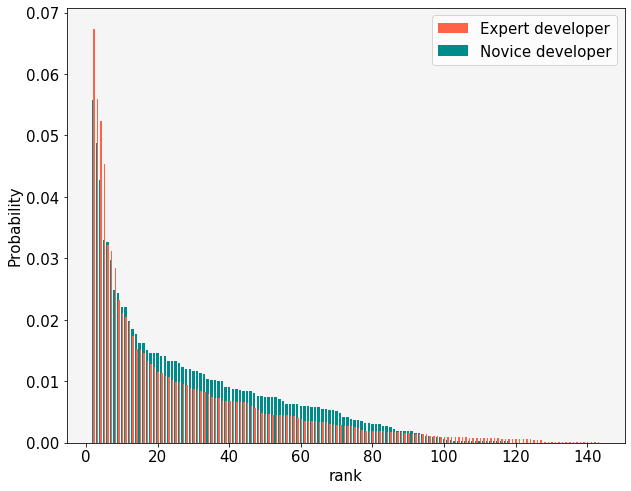

In [26]:

N = 5


ind = np.arange(N)  # the x locations for the groups
width = 0.7   # the width of the bars

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
#plt.figure(figsize=(10,10))
rects2 = ax.bar(chart_smp1['rank'], chart_smp1['nov_pro'], width=width, color='darkcyan')
rects1 = ax.bar((chart_smp1['rank']+0.25*width),chart_smp1['expert_pro'],  width=0.6*width, color='tomato')


ax.set_ylabel('Probability',fontsize=15)
ax.set_xlabel('rank',fontsize=15)


ax.legend( (rects1[0], rects2[0]), ('Expert developer', 'Novice developer'), fontsize=15)
ax.set_facecolor('whitesmoke')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('samp_dev_bar_1.png',dpi=700)
plt.show()

In [27]:
def pooled_standard_deviation(sample1,sample2):
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof=1) , np.var(sample2, ddof=1)
    numerator = ((n1-1)*var1) + ((n2-1)*var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [28]:
def cohens_d(sample1,sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled =  pooled_standard_deviation(sample1,sample2)
    return ((u1-u2)/s_pooled)

In [29]:
cdf_pr = np.sort(zipf_dt['Probability'])
cdf_zipf = np.sort(zipf_dt['zipflaw'])
cdf_pr_null_hyp = [norm.cdf(x) for x in cdf_pr]
cdf_zipf_null_hyp = [norm.cdf(x) for x in cdf_zipf]

In [30]:
#Zipf_mandelbrot
def logML_mbt(a):  
    pro = -a[0]*np.log(rank+a[1]) - np.log(np.sum(1/(rank+a[1])**a[0]))
    

    # Multiply the vector by frequencies
    Lvector = pro * frequency

    # LL is the sum
    L = Lvector.sum()

    # We want to maximize LogLikelihood or minimize (-1)*LogLikelihood
    return(-L)

In [31]:
def zipflaw(dt):
    zipf_dt = pd.DataFrame(columns=['Frequency'])
    nov_freq = dt.drop(['Author'])
    temp2=nov_freq[nov_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    probability = frequency/np.sum(frequency)
    zipf_dt['Frequency'] = frequency
    zipf_dt['Probability'] = probability
    rank=np.array(range(1,len(temp2)+1))
    zipf_dt['rank'] = rank
    initial = (1,1)
    s_best = sp.optimize.minimize(logML_mbt, initial)
    alpha=s_best.x[0]
    beta = s_best.x[1]
    zipf_dt['alpha'] = alpha
    zipf_dt['beta'] = beta
    zipf_dt['zipflaw']=((rank+beta)**(-alpha))/np.sum(1/(rank+beta)**alpha)
    zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
    zipf_dt['log_rank'] = np.log(rank)
    zipf_dt['log_zipflaw'] =  -alpha*np.log(rank+beta) - np.log(np.sum(1/(rank+beta)**alpha))
    return zipf_dt